In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
#Import all the required libraries:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer

In [11]:
#Initialise the Aer Backend
backend = Aer.get_backend('qasm_simulator')
#Create 3 qubits, 2 of which are ancillas for repeating the original qubit:
qbit = QuantumRegister(3,'q')
#One Classical bit for measurement:
cbit = ClassicalRegister(1,'c')

In [14]:
#Creating the circuit:
circuit = QuantumCircuit(qbit,cbit)
#Adding the controlled-NOT gates for qubits 0 and 1, and 0 and 2 - 0 as target.
circuit.cx(qbit[0],qbit[1])
circuit.cx(qbit[0],qbit[2])
#Adding Hadamard to all qubits to create a superposition:
circuit.h(qbit[0]) 
circuit.h(qbit[1])
circuit.h(qbit[2])
circuit.measure(qbit[0],cbit[0])


In [15]:
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print(counts)

Job Status: job has successfully run
{'1': 503, '0': 497}


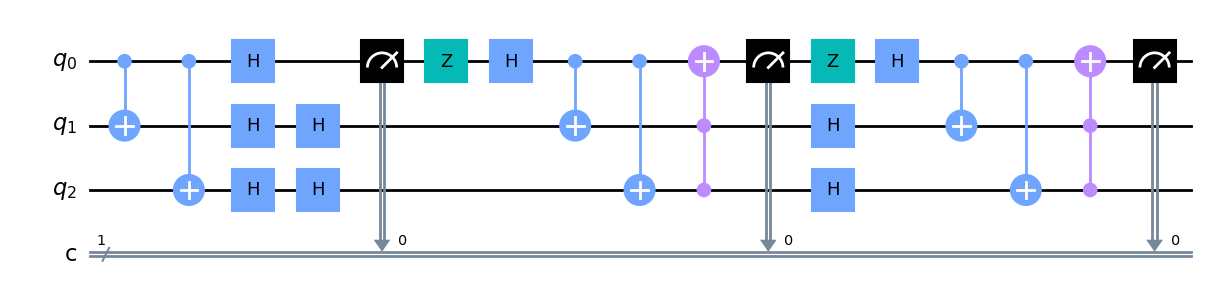

In [17]:
#Adding Z gate to qubit 0 to simulate a phase flip:
circuit.z(qbit[0])
#Re-adding Hadamard to all qubits to remove the earlier created superposition:
circuit.h(qbit[0])
circuit.h(qbit[1])
circuit.h(qbit[2])
#Re-applying the controlled-NOT gates and a Toffoli gate for error correction:
circuit.cx(qbit[0],qbit[1])
circuit.cx(qbit[0],qbit[2])
circuit.ccx(qbit[2],qbit[1],qbit[0])
#Measuring the correction:
circuit.measure(qbit[0],cbit[0])
circuit.draw('mpl')

In [18]:
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print(counts)

Job Status: job has successfully run
{'0': 516, '1': 484}
